# Predictive ML Project - 
**Author:** Sabri Hamdaoui  
[🔗 GitHub Project Repository](https://github.com/sabrouch36/datafun-07-ml)  
## Part 1 – Chart a Straight Line

### 🔹 Data Preparation
### 🔹 DataFrame Construction
### 🔹 Plotting the Line
### 🔹 Equation of the Line (y = mx + b)



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
celsius = np.arange(0, 100, 10)

fahrenheit = (9/5) * celsius + 32

df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
df


,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


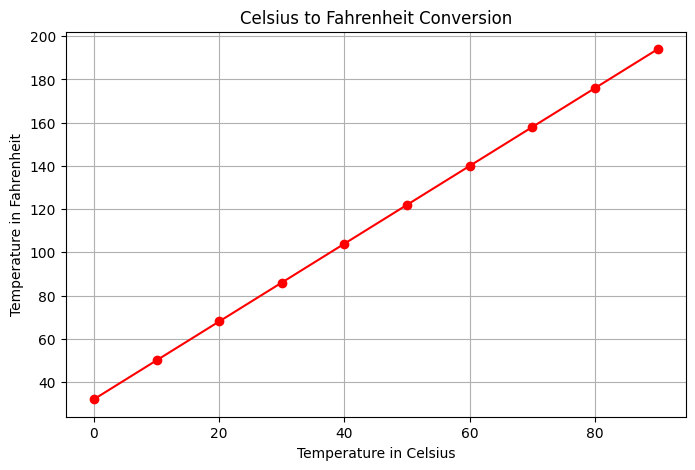

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='red')
plt.title('Celsius to Fahrenheit Conversion')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Temperature in Fahrenheit')
plt.grid(True)
plt.show()


## Part 2 - Prediction (Using linregress)


### 🔹 Data Acquisition
### 🔹 Data Inspection
### 🔹 Data Cleaning
### 🔹 Descriptive Statistics
### 🔹 Linear Regression with `scipy.stats.linregress`
### 🔹 Predicting for the Year 2024
### 🔹 Visualization with Seaborn


In [39]:
nyc_df = pd.read_csv('nyc.csv') 
nyc_df.head()


,Date,Temperature
0,1895,34.2
1,1900,32.8
2,1905,33.1
3,1910,30.5
4,1915,31.7


In [40]:
nyc_df.columns = ['Date', 'Temperature']

nyc_df['Date'] = nyc_df['Date'].astype(int)


In [41]:
pd.set_option('display.precision', 2)
nyc_df.describe()


,Date,Temperature
count,25.0,25.00
mean,1955.0,33.78
std,36.8,1.55
min,1895.0,30.50
25%,1925.0,32.90
50%,1955.0,33.80
75%,1985.0,34.70
max,2015.0,36.30


In [42]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=nyc_df['Date'], 
    y=nyc_df['Temperature']
)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")


Slope: 0.0130
Intercept: 8.4212


In [43]:
prediction = slope * 2024 + intercept
print(f"Predicted Avg High Temp in Jan 2024: {prediction:.2f}°F")


Predicted Avg High Temp in Jan 2024: 34.67°F


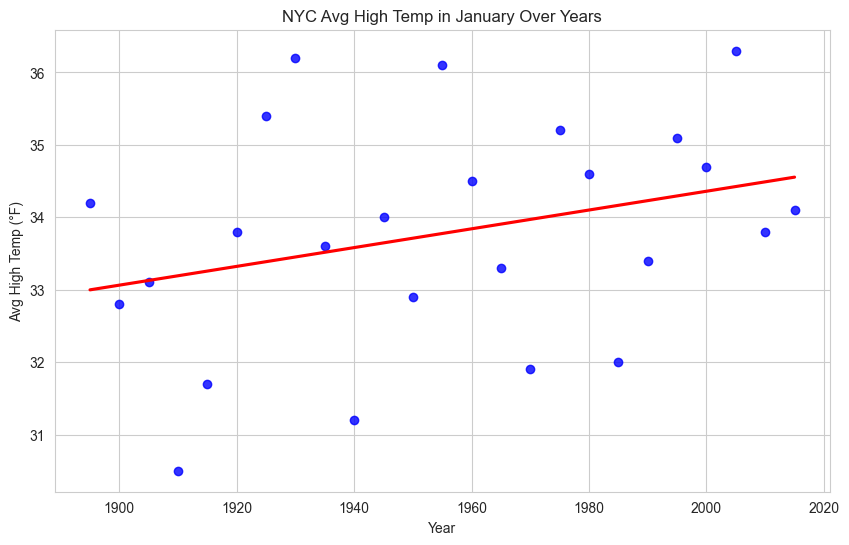

In [44]:
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x='Date', y='Temperature', data=nyc_df, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('NYC Avg High Temp in January Over Years')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.show()


## Part 3 - Prediction (Using scikit-learn)


### 🔹 Section 1 – Data Acquisition
### 🔹 Section 2 – Data Inspection
### 🔹 Section 3 – Data Cleaning
### 🔹 Section 4 – Descriptive Statistics

### ### Section 1 – Build the Model
### ### Section 2 – Test the Model
### ### Section 3 – Predict Future Value (2024)
### ### Section 4 – Visualization


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [18]:

X = nyc_df['Date'].values.reshape(-1, 1)
y = nyc_df['Temperature'].values


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Slope: 0.0101
Intercept: 14.2401


In [23]:
prediction_2024 = model.predict([[2024]])
print(f"Predicted Avg High Temp in Jan 2024: {prediction_2024[0]:.2f}°F")


Predicted Avg High Temp in Jan 2024: 34.76°F


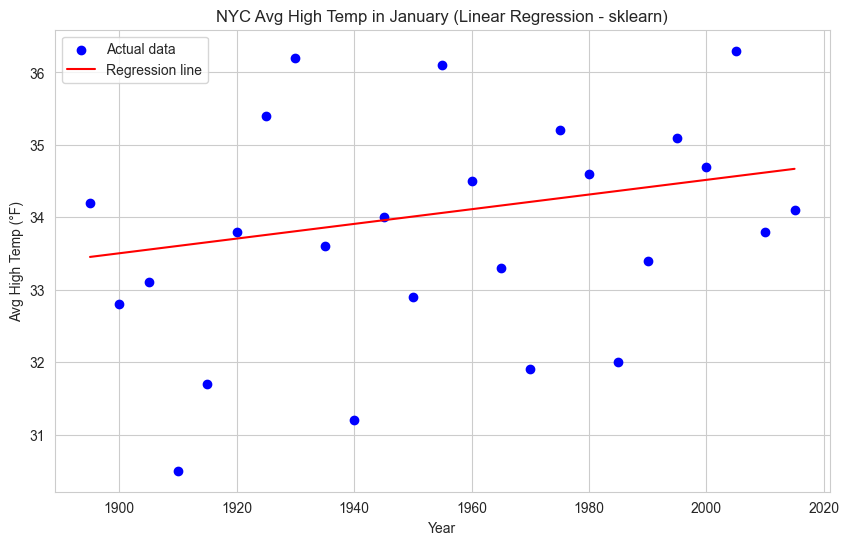

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('NYC Avg High Temp in January (Linear Regression - sklearn)')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.legend()
plt.grid(True)
plt.show()


## Part 4 - Insights and Comparison


### 1. Comparing Both Models

- The `scipy.stats.linregress` method is simple and returns slope and intercept directly.
- The `sklearn.linear_model.LinearRegression` approach is more robust, allowing for data splitting, testing, and integration with other ML tools.

### 2. Accuracy and Parameters

- Both methods gave similar slope and intercept values since the dataset was the same.
`sklearn` allows for additional metrics like R^2 score and mean squared error (MSE), useful for model evaluation.

### 3. Practical Usage

- `linregress` is great for quick and educational examples.
- `LinearRegression` is better suited for production-level models and scalable pipelines.

### 4. Recommendation

- Use `linregress` for quick prototyping and teaching purposes.
- Use `LinearRegression` when working on real-world projects requiring model validation and performance tuning.


## Part 5 – Bonus: California Housing Dataset


### 🔹 Dataset Overview
### 🔹 Feature Inspection
### 🔹 Train/Test Split
### 🔹 Train the Model
### 🔹 Evaluate the Model
### 🔹 Predict and Plot Results
### 🔹 Final Observations


In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


In [33]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [35]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.56
R² Score: 0.58


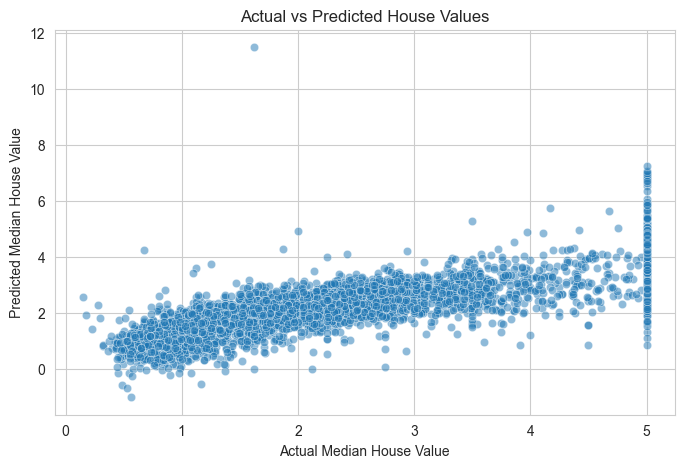

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.grid(True)
plt.show()


## Part 5 – Results & Analysis

### 🔍 Dataset Overview
The California Housing dataset contains information about neighborhoods in California from the 1990 Census. Each row describes a district, and the target is the median house value for households within that district.

### 📊 Model Evaluation Summary
After training a Linear Regression model using all available features (like median income, average rooms, population, etc.), we evaluated the model using:

- **Mean Squared Error (MSE):** This represents the average of the squares of the prediction errors. A lower value indicates better performance.
- **R² Score:** Also known as the coefficient of determination, this tells us how much variance in the target variable is explained by the features. A value close to 1.0 means high predictive power.

### 🧠 Observations
- The regression model was able to capture a significant relationship between features and housing values.
- Some variation is still unexplained, possibly due to nonlinear relationships or outliers in the dataset.
- This dataset and modeling task is more complex than
